In [456]:
import pandas as pd

customer_master = pd.read_csv('https://raw.githubusercontent.com/jin0choi1216/dataset/main/table_data_anlaysis/shopping_mall/customer_master.csv')
item_master = pd.read_csv('https://raw.githubusercontent.com/jin0choi1216/dataset/main/table_data_anlaysis/shopping_mall/item_master.csv')
transaction_1 =pd.read_csv('https://raw.githubusercontent.com/jin0choi1216/dataset/main/table_data_anlaysis/shopping_mall/transaction_1.csv')
transaction_2 =pd.read_csv('https://raw.githubusercontent.com/jin0choi1216/dataset/main/table_data_anlaysis/shopping_mall/transaction_2.csv')
transaction_detail_1 =pd.read_csv('https://raw.githubusercontent.com/jin0choi1216/dataset/main/table_data_anlaysis/shopping_mall/transaction_detail_1.csv')
transaction_detail_2 =pd.read_csv('https://raw.githubusercontent.com/jin0choi1216/dataset/main/table_data_anlaysis/shopping_mall/transaction_detail_2.csv')


# 데이터 결합
인덱스 설정 필요

In [457]:
transaction = pd.concat([transaction_1, transaction_2,], ignore_index=True) # 인덱스 
transaction_detail = pd.concat([transaction_detail_1, transaction_detail_2,], ignore_index=True)

In [458]:
transaction

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865
...,...,...,...,...
6781,T0000006894,180000,2019-07-31 21:20:44,HI400734
6782,T0000006895,85000,2019-07-31 21:52:48,AS339451
6783,T0000006896,100000,2019-07-31 23:35:25,OA027325
6784,T0000006897,85000,2019-07-31 23:39:35,TS624738


In [459]:
transaction_detail

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2
...,...,...,...,...
7139,7139,T0000006894,S004,1
7140,7140,T0000006895,S002,1
7141,7141,T0000006896,S001,2
7142,7142,T0000006897,S002,1


In [460]:
merge1 = pd.merge(left = transaction_detail, right = transaction, 
                on = 'transaction_id', how = 'left')
merge1

,detail_id,transaction_id,item_id,quantity,price,payment_date,customer_id
0,0,T0000000113,S005,1,210000,2019-02-01 01:36:57,PL563502
1,1,T0000000114,S001,1,50000,2019-02-01 01:37:23,HD678019
2,2,T0000000115,S003,1,120000,2019-02-01 02:34:19,HD298120
3,3,T0000000116,S005,1,210000,2019-02-01 02:47:23,IK452215
4,4,T0000000117,S002,2,170000,2019-02-01 04:33:46,PL542865
...,...,...,...,...,...,...,...
7139,7139,T0000006894,S004,1,180000,2019-07-31 21:20:44,HI400734
7140,7140,T0000006895,S002,1,85000,2019-07-31 21:52:48,AS339451
7141,7141,T0000006896,S001,2,100000,2019-07-31 23:35:25,OA027325
7142,7142,T0000006897,S002,1,85000,2019-07-31 23:39:35,TS624738


각 테이블과 컬럼의 특성을 고려하면 좋지 못한 사례이다.
price(거래 영수증의 총가격)와 quantity(제품의 묶음) 과 함께 해석하다보면 혼선이 발생한다.
price 제거하고 merge 한다.

In [461]:
merge1 = pd.merge(left = transaction_detail, 
                  right = transaction.drop('price', axis = 1), 
                on = 'transaction_id', how = 'left')
merge1

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865
...,...,...,...,...,...,...
7139,7139,T0000006894,S004,1,2019-07-31 21:20:44,HI400734
7140,7140,T0000006895,S002,1,2019-07-31 21:52:48,AS339451
7141,7141,T0000006896,S001,2,2019-07-31 23:35:25,OA027325
7142,7142,T0000006897,S002,1,2019-07-31 23:39:35,TS624738


In [462]:
# 위에서 생성한 merge1데이터프레임과 customer_master, item_master를 merge해보세요.
merge2 = pd.merge(left = merge1, right = item_master,
                  how = 'left',
                  on = 'item_id')
merge2

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,item_name,item_price
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,PC-E,210000
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,PC-A,50000
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,PC-C,120000
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,PC-E,210000
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,PC-B,85000
...,...,...,...,...,...,...,...,...
7139,7139,T0000006894,S004,1,2019-07-31 21:20:44,HI400734,PC-D,180000
7140,7140,T0000006895,S002,1,2019-07-31 21:52:48,AS339451,PC-B,85000
7141,7141,T0000006896,S001,2,2019-07-31 23:35:25,OA027325,PC-A,50000
7142,7142,T0000006897,S002,1,2019-07-31 23:39:35,TS624738,PC-B,85000


In [463]:
merge3 = pd.merge(left = merge2, right = customer_master, 
                  how = 'left', 
                  on = 'customer_id')
merge3

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,item_name,item_price,customer_name,registration_date,email,gender,age,birth,pref
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,PC-E,210000,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,PC-A,50000,김영웅,2019-01-27 18:00,mifune_rokurou@example.com,M,73,1945-11-29,서울특별시
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,PC-C,120000,김강현,2019-01-11 8:16,yamane_kogan@example.com,M,42,1977-05-17,광주광역시
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,PC-E,210000,김주한,2019-01-10 5:07,ikeda_natsumi@example.com,F,47,1972-03-17,인천광역시
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,PC-B,85000,김영빈,2019-01-25 6:46,kurita_kenichi@example.com,M,74,1944-12-17,광주광역시
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7139,7139,T0000006894,S004,1,2019-07-31 21:20:44,HI400734,PC-D,180000,김윤성,2019-01-04 13:24,shishido_akira@example.com,M,64,1955-01-13,대구광역시
7140,7140,T0000006895,S002,1,2019-07-31 21:52:48,AS339451,PC-B,85000,김무경,2019-02-11 19:34,aihara_miki@example.com,F,74,1945-02-03,대구광역시
7141,7141,T0000006896,S001,2,2019-07-31 23:35:25,OA027325,PC-A,50000,박준석,2019-04-17 9:23,matsuda_saki@example.com,F,40,1979-05-25,서울특별시
7142,7142,T0000006897,S002,1,2019-07-31 23:39:35,TS624738,PC-B,85000,이가빈,2019-02-20 18:15,shinndou_masatoshi@example.com,M,56,1963-02-21,인천광역시


In [464]:
merge3.isnull().sum()

detail_id            0
transaction_id       0
item_id              0
quantity             0
payment_date         0
customer_id          0
item_name            0
item_price           0
customer_name        0
registration_date    0
email                0
gender               0
age                  0
birth                0
pref                 0
dtype: int64

In [465]:
merge3['price'] = merge3['quantity'] * merge3['item_price']

In [466]:
print(merge3['price'].sum())
print(transaction['price'].sum())

971135000
971135000


In [467]:
merge3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7144 entries, 0 to 7143
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   detail_id          7144 non-null   int64 
 1   transaction_id     7144 non-null   object
 2   item_id            7144 non-null   object
 3   quantity           7144 non-null   int64 
 4   payment_date       7144 non-null   object
 5   customer_id        7144 non-null   object
 6   item_name          7144 non-null   object
 7   item_price         7144 non-null   int64 
 8   customer_name      7144 non-null   object
 9   registration_date  7144 non-null   object
 10  email              7144 non-null   object
 11  gender             7144 non-null   object
 12  age                7144 non-null   int64 
 13  birth              7144 non-null   object
 14  pref               7144 non-null   object
 15  price              7144 non-null   int64 
dtypes: int64(5), object(11)
memory usage: 893.

In [468]:
merge3['birth'] = pd.to_datetime(merge3['birth'])
merge3['payment_date'] = pd.to_datetime(merge3['payment_date'])
merge3.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,item_name,item_price,customer_name,registration_date,email,gender,age,birth,pref,price
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,PC-E,210000,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시,210000
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,PC-A,50000,김영웅,2019-01-27 18:00,mifune_rokurou@example.com,M,73,1945-11-29,서울특별시,50000
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,PC-C,120000,김강현,2019-01-11 8:16,yamane_kogan@example.com,M,42,1977-05-17,광주광역시,120000
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,PC-E,210000,김주한,2019-01-10 5:07,ikeda_natsumi@example.com,F,47,1972-03-17,인천광역시,210000
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,PC-B,85000,김영빈,2019-01-25 6:46,kurita_kenichi@example.com,M,74,1944-12-17,광주광역시,170000


## 실습

In [469]:
# 1. 성별에 따른 매출 총합을 비교하고 어떤 성별이 매출이 더 높은지 구해보세요.
merge3.groupby(by = ['gender'])['price'].sum() # 방법1
merge3[['gender','price']].groupby('gender').sum() # 방법2

,price
gender,
F,481045000
M,490090000


In [470]:
# 2. birth 칼럼을 활용하여 고객의 태어난 년도 별 매출을 구해보세요.
merge3['year'] = pd.to_datetime(merge3['birth']).dt.year
merge3.groupby(by='year')['price'].sum() # 방법1
merge3[['year', 'price']].groupby(by='year').sum() # 방법2
merge3.pivot_table(index='gender',  values='price', aggfunc='sum') # pivot_table 사용
pd.pivot_table(data = merge3,index='gender',  values='price', aggfunc='sum') # pivot_table 사용

,price
gender,
F,481045000
M,490090000


In [471]:
merge3.head(2)

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,item_name,item_price,customer_name,registration_date,email,gender,age,birth,pref,price,year
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,PC-E,210000,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시,210000,1989
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,PC-A,50000,김영웅,2019-01-27 18:00,mifune_rokurou@example.com,M,73,1945-11-29,서울특별시,50000,1945


In [472]:
# payment_date칼럼을 활용하여 구매년월(payment_month) 칼럼을 생성하고 
# 구매년월, 아이템 이름에 따른 매출 총합과 수량 총합을 구해보세요.
# ex) 구매년월 : 201903


# pd.to_datetime() 사용 안한 이유는 이미 birth 타입이 datetime 이다. 그러므로 바로 .dt 사용 가능
merge3['payment_month'] = merge3['birth'].dt.strftime('%Y%m')

subset1 = merge3[['payment_month', 'item_name', 'price', 'quantity']]
subset1.groupby(['payment_month', 'item_name']).sum()

price  quantity
payment_month item_name                  
193808        PC-E       210000         1
193809        PC-A       100000         2
              PC-D       180000         1
              PC-E       210000         1
193810        PC-A       200000         4
...                         ...       ...
199906        PC-E       630000         3
199907        PC-A       150000         3
              PC-B       170000         2
              PC-C       120000         1
              PC-E       210000         1

[2763 rows x 2 columns]

# 데이터 시각화
## 시각화 갤러리
https://matplotlib.org/stable/gallery/index.html <br>
https://seaborn.pydata.org/examples/index.html <br>
https://plotly.com/python/

## matplotlib 개념
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html <br>
Figure vs Axes vs Axis<br>
Figure 도화지<br>
Axes 그래프<br>
Axis 축

In [473]:
!pip3 install matplot

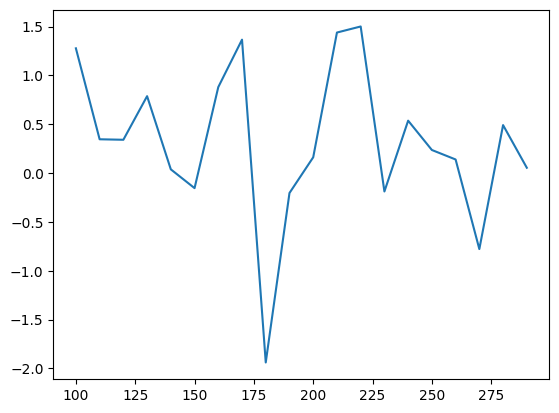

In [474]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(100, 300, 10)
y = np.random.randn(20)

plt.plot(x, y)

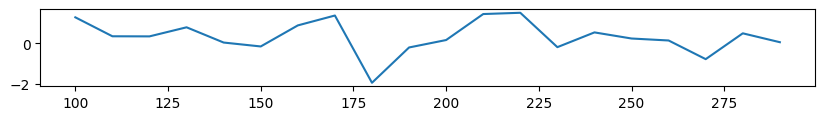

In [475]:
plt.figure(figsize=(10, 1))
plt.plot(x, y)

Text(0.5, 1.0, 'Title')

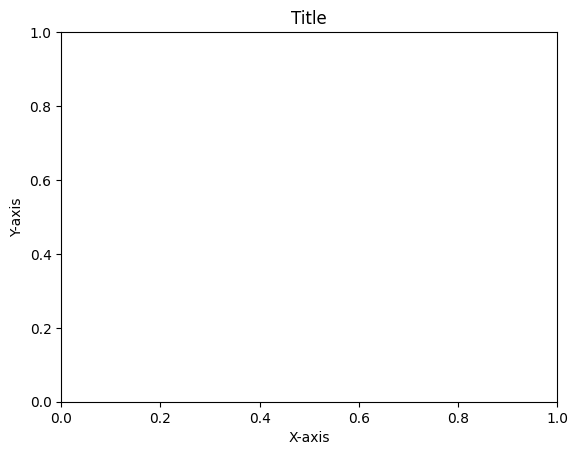

In [476]:
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Title')


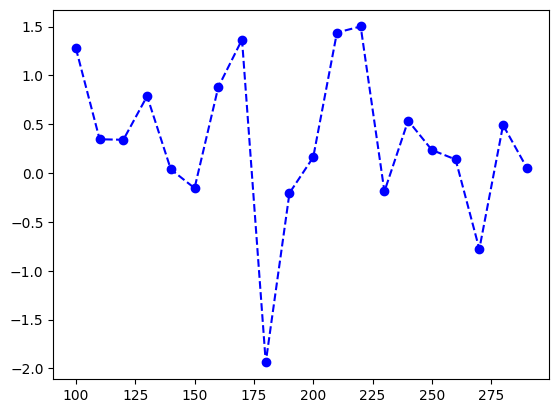

In [477]:
plt.plot(x,y, color='blue', linestyle = '--', marker = 'o')

## 여러개의 그래프 그리기

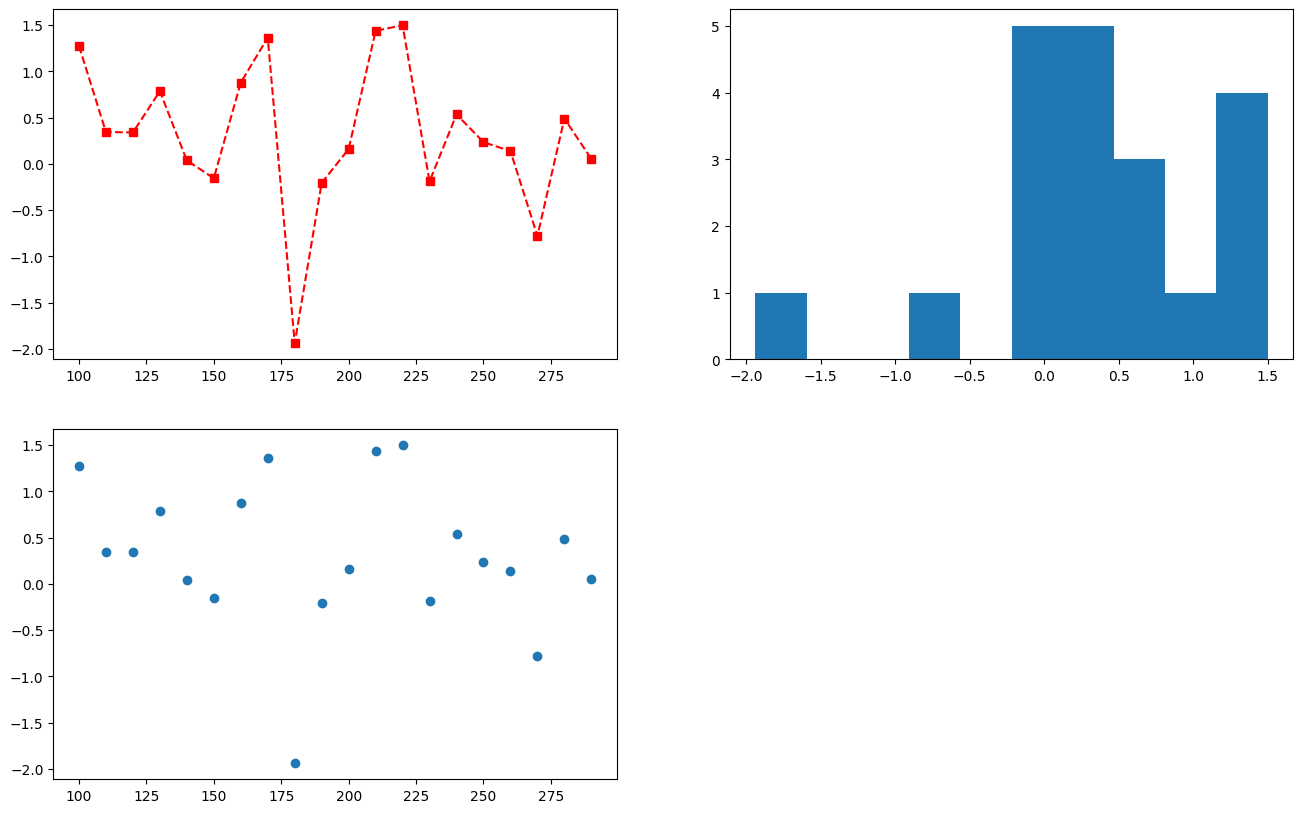

In [478]:
fig = plt.figure(figsize = (16, 10))

axes1 = fig.add_subplot(2, 2, 1) # row, column, index
axes1.plot(x, y, color = 'r', linestyle = '--', marker = 's')

axes2 = fig.add_subplot(2, 2, 2) # row, column, index
axes2.hist(y)

axes3 = fig.add_subplot(2, 2, 3) # row, column
axes3.scatter(x,y)


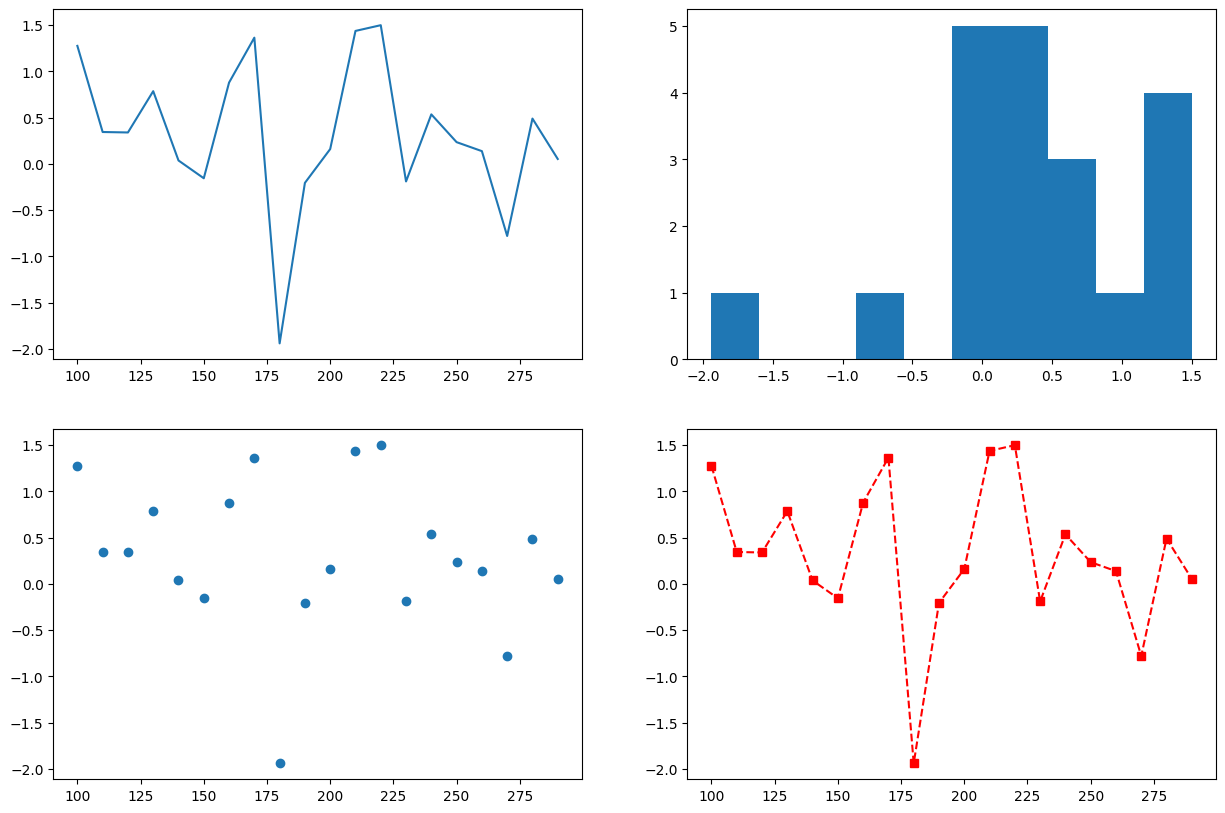

In [479]:
fig, axes = plt.subplots(2,2,figsize = (15,10))
axes[0,0].plot(x, y)
axes[0,1].hist(y)
axes[1,0].scatter(x,y)
axes[1,1].plot(x, y,'r--s')

## 하나의 figure 안에 두개의 그래프 그리기

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


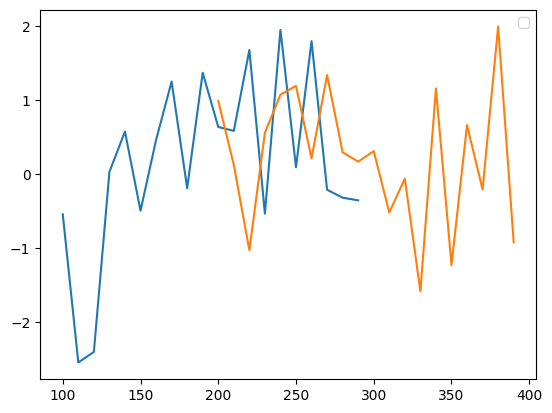

In [480]:
x1 = np.arange(100, 300, 10)
y1 = np.random.randn(20)

x2 = np.arange(200, 400, 10)
y2 = np.random.randn(20)

plt.plot(x1, y1)#, label='x1')
plt.plot(x2, y2)#, lable='x2')


plt.legend(loc = 1)

## 여러 그래프의 label, title 다루기

Text(0.5, 0.98, 'Figure Title')

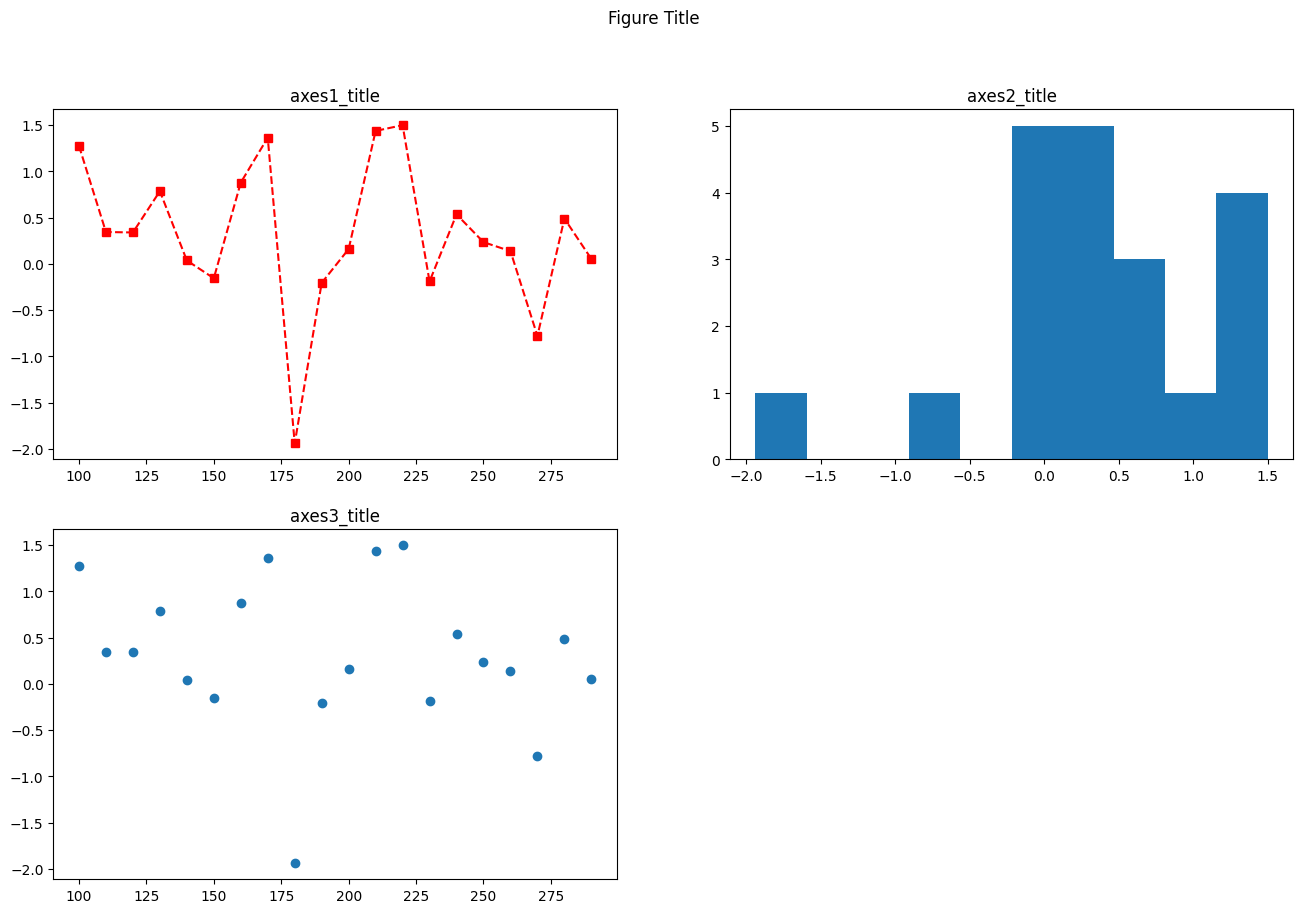

In [481]:
fig = plt.figure(figsize = (16,10))

axes1 = fig.add_subplot(2,2,1) # 2x2 사이즈 만들어서 첫번째
axes1.plot(x, y, color = 'r', linestyle = '--', marker = 's')
axes1.set_title('axes1_title')

axes2 = fig.add_subplot(2,2,2) # 2x2 사이즈 만들어서 두번째
axes2.hist(y)
axes2.set_title('axes2_title')

axes3 = fig.add_subplot(2,2,3) # 2x2 사이즈 만들어서 세번째
axes3.scatter(x,y)
axes3.set_title('axes3_title')

fig.suptitle('Figure Title')

# 실습
20230913_과제(댓글로 제출)
1. 자동차 제조사에 따른 자동차 종류의 개수
2. 자동차 배기량과 고속도로 연비 시각화
3. 자동차 구동방식 별 도시연비 비교 시각화

In [482]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

mpg = pd.read_csv(
    'https://raw.githubusercontent.com/jin0choi1216/dataset/main/mpg.csv')

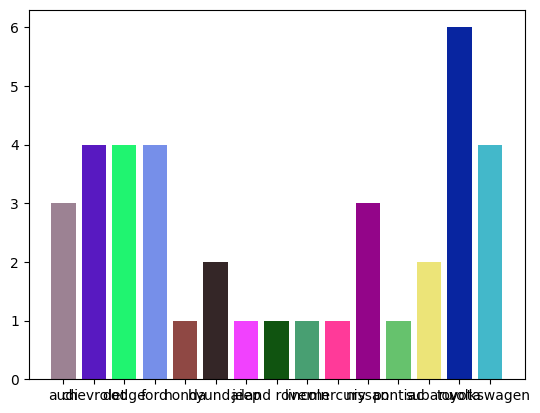

In [483]:
# 1. 자동차 제조사에 따른 자동차 종류의 개수
model_count_by_manu = mpg[['manufacturer','model']].\
    drop_duplicates().\
    groupby('manufacturer').count()

def random_color(lens: pd.DataFrame):
    return [{np.random.random(), np.random.random(), np.random.random()} \
            for i in range(len(lens))]

x = range(model_count_by_manu.size)
count = model_count_by_manu['model']
manufacturer = model_count_by_manu.index

plt.bar(x, count, color=random_color(model_count_by_manu))
plt.xticks(x, manufacturer)

plt.show()



In [484]:
mpg2 = mpg[['displ', 'hwy']]


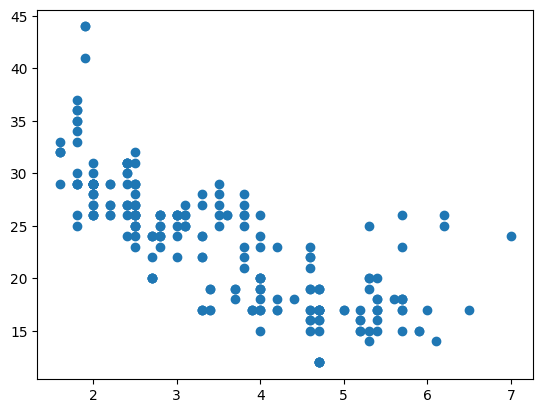

In [488]:
# 2. 자동차 배기량(displ)과 고속도로 연비(hwy) 시각화
import numpy as np
import matplotlib.pyplot as plt
displ = mpg['displ']
hwy = mpg['hwy']

plt.scatter(displ, hwy)
plt.show()

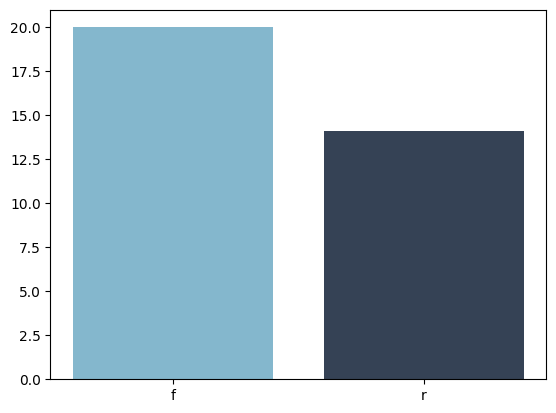

In [486]:
# 3. 자동차 구동방식(drv) 별 도시연비 (city)비교 시각화
mpg_drop = mpg.drop(mpg.query('drv != "r" and drv != "f"').index)
#mpg_drop
mpg_city_by_drv = mpg_drop[['drv', 'cty']].groupby(['drv']).mean()

x = range(mpg_city_by_drv.size)

drv = mpg_city_by_drv['cty']
values = mpg_city_by_drv.index

plt.bar(x, drv, color=random_color(mpg_city_by_drv))
plt.xticks(x, values)

plt.show()
